In [1]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import pickle

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.svm import SVC
from sklearn.feature_selection import RFE, RFECV
from sklearn.pipeline import Pipeline

import scipy.stats as st

from IPython.display import display, Markdown, Latex

In [2]:
# loading holdout
cv_num = 3
random_state = 200
train_val_x_list = pd.read_csv(f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/train_certain_mrn_rad.csv").MRN.tolist()
holdout_x_list = pd.read_csv(f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/holdout_uncertain_mrn_rad.csv").MRN.tolist()


In [3]:
'''

Features selected with primary_rd_feature_radiomic_model.ipynb

'''

'\n\nFeatures selected with primary_rd_feature_radiomic_model.ipynb\n\n'

<h2>Loading data

dataframe shape:  (186, 813)


<h2>Viewing initial stratified split

<h2>Repeating CV w/o the holdout set; Multivariable Model

loading features
{'ctsim': ['original_firstorder_Range-ctsim', 'hpv_total', 'original_firstorder_Skewness-ctsim', 'gradient_gldm_DependenceEntropy-ctsim', 'Clinical T Stage', 'Disease Site_cat_5', 'pack_year_strat', 'original_glrlm_RunLengthNonUniformityNormalized-ctsim', 'original_shape_Flatness-ctsim', 'gradient_firstorder_MeanAbsoluteDeviation-ctsim'], 'pet_ct': ['original_gldm_GrayLevelNonUniformity-pet_ct', 'hpv_total', 'original_firstorder_90Percentile-pet_ct', 'original_glszm_SmallAreaLowGrayLevelEmphasis-pet_ct', 'gradient_glszm_GrayLevelNonUniformity-pet_ct', 'original_firstorder_Entropy-pet_ct', 'original_gldm_SmallDependenceEmphasis-pet_ct', 'original_firstorder_RobustMeanAbsoluteDeviation-pet_ct', 'original_glcm_DifferenceEntropy-pet_ct', 'gradient_glszm_SmallAreaEmphasis-pet_ct', 'gradient_gldm_DependenceEntropy-pet_ct'], 'pet': ['original_firstorder_Range-pet', 'hpv_total', 'original_firstorder_Skewness-pet', 'gradient_gldm_DependenceEntropy-pet', 'Clinical T Stage', 'Dis


<h4>Training Data


<h5>Scaling the training data

Scaling complete




<h4>Testing Data


<h5>Scaling the test data

Scaling complete




<h3>Starting RFECV Process

All scoring keys:
dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


Current scoring function: roc_auc
Current


<h4>Reviewing RFECV outcomes

['original_firstorder_Skewness-ctsim', 'original_glrlm_RunLengthNonUniformityNormalized-ctsim', 'gradient_firstorder_MeanAbsoluteDeviation-ctsim']
3



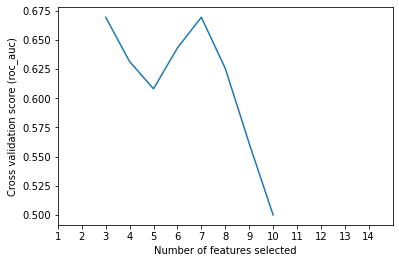


<h4>Evaluating optimal # of features to use per RFECV

new number of train and test samples:  64 32
********************************************************************************
awaiting all variables to be evaluated...
['original_firstorder_Range-ctsim', 'original_firstorder_Skewness-ctsim', 'pack_year_strat']
3

['original_firstorder_Range-ctsim', 'hpv_total', 'original_firstorder_Skewness-ctsim', 'Disease Site_cat_5', 'original_glrlm_RunLengthNonUniformityNormalized-ctsim', 'original_shape_Flatness-ctsim']
6

train labels:  7
test labels:  3
MinMaxScaler() , parameters:  {'copy': True, 'feature_range': (0, 1)}



<h4>Training Data


<h5>Scaling the training data

Scaling complete




<h4>Testing Data


<h5>Scaling the test data

Scaling complete




<h3>Starting RFECV Process

All scoring keys:
dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


Current scoring function: roc_auc
Current


<h4>Reviewing RFECV outcomes

['original_firstorder_90Percentile-pet_ct', 'original_glszm_SmallAreaLowGrayLevelEmphasis-pet_ct', 'original_firstorder_Entropy-pet_ct', 'original_firstorder_RobustMeanAbsoluteDeviation-pet_ct', 'gradient_glszm_SmallAreaEmphasis-pet_ct']
5



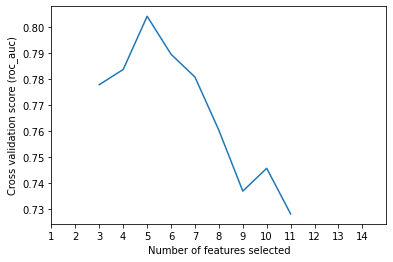


<h4>Evaluating optimal # of features to use per RFECV

new number of train and test samples:  64 32
********************************************************************************
awaiting all variables to be evaluated...
['original_gldm_GrayLevelNonUniformity-pet_ct', 'hpv_total', 'original_firstorder_90Percentile-pet_ct', 'original_glszm_SmallAreaLowGrayLevelEmphasis-pet_ct', 'gradient_glszm_GrayLevelNonUniformity-pet_ct', 'original_firstorder_Entropy-pet_ct', 'original_gldm_SmallDependenceEmphasis-pet_ct', 'original_firstorder_RobustMeanAbsoluteDeviation-pet_ct', 'original_glcm_DifferenceEntropy-pet_ct', 'gradient_glszm_SmallAreaEmphasis-pet_ct', 'gradient_gldm_DependenceEntropy-pet_ct']
11

['original_gldm_GrayLevelNonUniformity-pet_ct', 'hpv_total', 'original_firstorder_90Percentile-pet_ct', 'original_glszm_SmallAreaLowGrayLevelEmphasis-pet_ct', 'gradient_glszm_GrayLevelNonUniformity-pet_ct', 'original_firstorder_RobustMeanAbsoluteDeviation-pet_ct', 'gradient_glszm_SmallAreaEmphasis-pet_ct']
7

train labels:  7
test labels:  3
MinMax


<h4>Training Data


<h5>Scaling the training data

Scaling complete




<h4>Testing Data


<h5>Scaling the test data

Scaling complete




<h3>Starting RFECV Process

All scoring keys:
dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


Current scoring function: roc_auc
Current


<h4>Reviewing RFECV outcomes

['original_firstorder_Range-pet', 'original_firstorder_Skewness-pet', 'gradient_gldm_DependenceEntropy-pet', 'original_glrlm_RunLengthNonUniformityNormalized-pet']
4



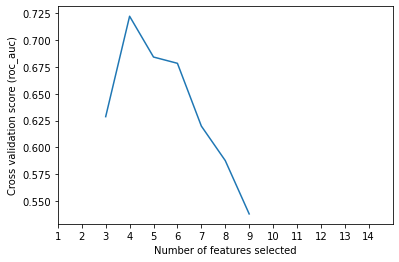


<h4>Evaluating optimal # of features to use per RFECV

new number of train and test samples:  64 32
********************************************************************************
awaiting all variables to be evaluated...
['original_firstorder_Range-pet', 'original_firstorder_Skewness-pet', 'pack_year_strat']
3

['original_firstorder_Range-pet', 'hpv_total', 'original_firstorder_Skewness-pet', 'gradient_gldm_DependenceEntropy-pet', 'Disease Site_cat_5', 'original_glrlm_RunLengthNonUniformityNormalized-pet', 'original_shape_Flatness-pet']
7

train labels:  7
test labels:  3
MinMaxScaler() , parameters:  {'copy': True, 'feature_range': (0, 1)}



<h4>Training Data


<h5>Scaling the training data

Scaling complete




<h4>Testing Data


<h5>Scaling the test data

Scaling complete




<h3>Starting RFECV Process

All scoring keys:
dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


Current scoring function: roc_auc
Current


<h4>Reviewing RFECV outcomes

['original_gldm_GrayLevelVariance-bed', 'original_ngtdm_Strength-bed', 'original_glszm_SmallAreaLowGrayLevelEmphasis-bed', 'original_glcm_Autocorrelation-bed', 'original_gldm_DependenceEntropy-bed', 'original_glszm_SmallAreaEmphasis-bed']
6



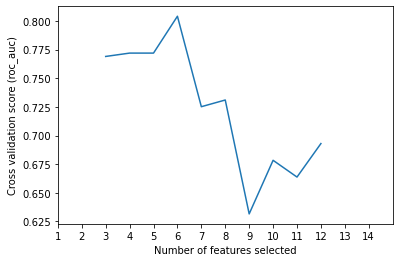


<h4>Evaluating optimal # of features to use per RFECV

new number of train and test samples:  64 32
********************************************************************************
awaiting all variables to be evaluated...
['hpv_total', 'original_gldm_GrayLevelVariance-bed', 'gradient_firstorder_MeanAbsoluteDeviation-bed', 'original_glcm_Correlation-bed', 'original_ngtdm_Strength-bed', 'original_glszm_SmallAreaLowGrayLevelEmphasis-bed', 'original_glcm_Autocorrelation-bed', 'Clinical T Stage', 'original_gldm_DependenceEntropy-bed', 'original_glszm_SmallAreaEmphasis-bed']
10

['hpv_total', 'original_gldm_GrayLevelVariance-bed', 'gradient_firstorder_MeanAbsoluteDeviation-bed', 'original_glcm_Correlation-bed', 'original_ngtdm_Strength-bed', 'original_glcm_Autocorrelation-bed', 'Clinical T Stage', 'original_glszm_SmallAreaEmphasis-bed']
8

********************************************************************************
********************************************************************************
done


In [4]:
display(Markdown('<h2>Loading data'))
main_df = pd.read_csv(f"./data/primary_clinical_radiomic_features/complete_clinical_radiomic_features.csv")
print('dataframe shape: ', np.shape(main_df))

# loading holdout
cv_num = 3
random_state = 200
train_val_x_list = pd.read_csv(f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/train_certain_mrn_rad.csv").MRN.tolist()
holdout_x_list = pd.read_csv(f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/holdout_uncertain_mrn_rad.csv").MRN.tolist()

display(Markdown('<h2>Viewing initial stratified split'))
# print('train_val')
# print(train_val_x_list)
# print('')
# print('hold out')
# print(holdout_x_list)

# Breaking down data into X and y 
X = main_df
stratify_label = X['Primary_Recurrence']
X = X.drop(columns=['Primary_Recurrence'])
X_copy = X.copy()
y_copy = stratify_label.copy()
y_copy = pd.concat([X_copy['MRN'], y_copy], axis=1)
col_names = X.columns.tolist()
X = np.array(X)
y = np.array(stratify_label)


display(Markdown('<h2>Repeating CV w/o the holdout set; Multivariable Model'))
# loading data
X_train = X_copy.loc[X_copy.MRN.isin(train_val_x_list)]
X_train_copy = X_train.copy()
col_names = X_train.columns.tolist()

Y_train = y_copy.loc[y_copy.MRN.isin(train_val_x_list)]
Y_train = Y_train.Primary_Recurrence
Y_train_copy = Y_train.copy()

assert len(X_train) == len(Y_train), 'check size'
see_imputing_scaling = False
repeat = 200

store_dic = {i: {'features': [], 'test_auc': [], 'train_auc': [], 'scaler': [], 'model':[]} for i in range(repeat)}

### Split sklearn cross fold validation
import random
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print('loading features')
complete_feature_dict = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/all_modality_features_rad_02212022_v2.json"

with open(complete_feature_dict, 'rb') as handle:
    all_modality_features = pickle.load(handle)

print(all_modality_features)


random_list = np.load(f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/random_seed_list_02212022_v3.npy")

for img_modality in all_modality_features:
#     print(img_modality)
    store_dic = {i: {'features': [], 'test_auc': [], 'train_auc': [], 'scaler': [], 'model':[]} for i in range(repeat)}
    for ij in range(repeat):
        skf = StratifiedKFold(n_splits=cv_num, random_state=random_list[ij], shuffle=True)
        for ci, (train_index, test_index) in enumerate(skf.split(X_train, Y_train)):
            
            prior_selected_features = all_modality_features[img_modality]

            x_train, x_test = X_train[train_index], X_train[test_index]
            y_train, y_test = Y_train[train_index], Y_train[test_index]

            x_train = pd.DataFrame(x_train, columns=col_names)
            x_test = pd.DataFrame(x_test, columns=col_names)

        #     print(len(x_train))
            mrn_train = x_train.MRN.tolist()
        #     print(len(x_test))
            mrn_test = x_test.MRN.tolist()

            if ci == 0 and ij == 0:
                print('train labels: ', np.sum(y_train))
                print('test labels: ', np.sum(y_test))


            ### imputing missing data
            #### Set up for data imputing and scaling
        #             knn_imputer = KNNImputer(n_neighbors=5)
        #             impute_fit = knn_imputer.fit(X=x_train, y=y_train)
            scaler = MinMaxScaler(feature_range=(0, 1))
            if ci == 0 and ij == 0:
        #                 print(knn_imputer, ', parameters: ', knn_imputer.get_params())
        #                 print(impute_fit, ', parameters: ', impute_fit.get_params())
                print(scaler, ', parameters: ', scaler.get_params())

            ### transforming and scaling training and test data
            # Train data
            if ci == 0 and ij == 0:
                display(Markdown('\n<h4>Training Data'))
        #     display(Markdown('\n<h5>Imputing the missing data'))
        #     if see_imputing_scaling:
        #         print(f"data information pre-imputing:\n{x_train.info()}")
        #     x_train = impute_fit.transform(X=x_train)
            x_train = pd.DataFrame(x_train, columns=col_names)

        #     if see_imputing_scaling:
        #         print(f"\ndata information post-imputing:\n{x_train.info()}\n")
        #     print('Imputing complete')
        #     print('Adjusting imputed values\n')
        #     for r, v in [('Clinical T Stage', 5), ('Clinical N Stage', 4)]:
        #         if r in encoding_variables:
        #             x_train[r] = x_train[r].map(lambda x: clip_round(x, max_value=v))


            # x_train.to_csv(r'C:\Users\s185479\Desktop\Python_Code\Projects\Prostate_SBRT_GU_Toxicity\check_train.csv')
            if ci == 0 and ij == 0:
                display(Markdown('\n<h5>Scaling the training data'))
        #     if see_imputing_scaling:
        #         print(f"data range pre-scaling:\n")
        #         for col in x_train.columns.tolist():
        #             print(col, '\n', x_train[col].describe(), '\n')
            x_train = scaler.fit_transform(x_train)
            x_train = pd.DataFrame(x_train, columns=col_names)

            if ci == 0 and ij == 0:
                if see_imputing_scaling:
                    print(f"\ndata range post-scaling:\n")
                    for col in x_train.columns.tolist():
                        print(col, '\n', x_train[col].describe(), '\n')
                print('Scaling complete\n')

        #     # attempt ordinal encoder
        #     from sklearn.preprocessing import OrdinalEncoder
        #     print('encoding variables')
        #     for e in encoding_variables:
        #         enc = OrdinalEncoder()
        #         x_train[e] = enc.fit_transform(np.array(x_train[e]).reshape(-1,1))
        #         x_train[e] = x_train[e].map(lambda x: int(x))
        #         x_train[e] = x_train[e].astype('object')

            # x_train.to_csv(r'C:\Users\s185479\Desktop\Python_Code\Projects\Prostate_SBRT_GU_Toxicity\check_train_encoder.csv')
            # print(x_train.info())

            # Test data
            if ci == 0 and ij == 0:
                display(Markdown('\n<h4>Testing Data'))
        #         display(Markdown('\n<h5>Imputing the missing data'))
        #         if see_imputing_scaling:
        #             print(f"data information pre-imputing:\n{x_test.info()}")
        #         x_test = impute_fit.transform(X=x_test)
            x_test = pd.DataFrame(x_test, columns=col_names)
        #         if see_imputing_scaling:
        #             print(f"\ndata information post-imputing:\n{x_test.info()}\n")
        #         print('Imputing complete')

        #         print('Adjusting imputed values\n')
        #         for r, v in [('Clinical T Stage', 5), ('Clinical N Stage', 4)]:
        #             if r in encoding_variables:
        #                 x_test[r] = x_test[r].map(lambda x: clip_round(x, max_value=v))

            if ci == 0 and ij == 0:
                display(Markdown('\n<h5>Scaling the test data'))
                if see_imputing_scaling:
                    print(f"data range pre-scaling:\n")
                    for col in x_test.columns.tolist():
                        print(col, '\n', x_test[col].describe(), '\n')
            x_test = scaler.transform(x_test)
            x_test = pd.DataFrame(x_test, columns=col_names)

            if ci == 0 and ij == 0:
                if see_imputing_scaling:
                    print(f"data range post-scaling:\n")
                    for col in x_test.columns.tolist():
                        print(col, '\n', x_test[col].describe(), '\n')
                print('Scaling complete\n')
        #         print('Encoding variables')
        #         for e in encoding_variables:
        #             enc = OrdinalEncoder()
        #             x_test[e] = enc.fit_transform(np.array(x_test[e]).reshape(-json_file_dir)
        #             x_test[e] = x_test[e].map(lambda x: int(x))
        #             x_test[e] = x_test[e].astype('object')
            #     x_test.to_csv(r'C:\Users\s185479\Desktop\Python_Code\Projects\Prostate_SBRT_GU_Toxicity\check_test_encoder.csv')


        #             # need to create LN based training and test set
        #             x_train.MRN = mrn_train
        #             x_test.MRN = mrn_test

            x_train = x_train[prior_selected_features]
            x_test = x_test[prior_selected_features]

            ### rfe cv
            if ci == 0 and ij == 0:
                display(Markdown('\n<h3>Starting RFECV Process'))
            min_features_to_select = 3
            if ci == 0 and ij == 0:
                print(f"All scoring keys:\n{sklearn.metrics.SCORERS.keys()}")
                print('\n')
            scoring = 'roc_auc'
            if ci == 0 and ij == 0:
                print(f"Current scoring function: {scoring}")

            ### Setting the estimator for RFECV
            estimator = SVC(kernel='linear')
            if ci == 0 and ij == 0:
                print(f"Current estimator: {estimator}")
            rfe = RFECV(estimator=estimator, min_features_to_select=min_features_to_select, cv=sklearn.model_selection.StratifiedKFold(3), scoring=scoring)

            x_train_clin_drop = x_train[prior_selected_features]
            col_name_clin_drop = x_train_clin_drop.columns.tolist()

            rfe = rfe.fit(x_train_clin_drop, y_train)

            if ci == 0 and ij == 0:
                display(Markdown('\n<h4>Reviewing RFECV outcomes'))
            ### two ways to supposedly obtain the same information
            column_name_df = pd.DataFrame(col_name_clin_drop)
            selected_features_ = [x for i, x in enumerate(col_name_clin_drop) if rfe.support_[i] == True]

            if ij == 0:
                print(selected_features_)
                # print([y for x, y in list(zip(rfe.ranking_, col_names)) if x == 1])
                print(rfe.n_features_)
                # print(rfe.cv_results_['mean_test_score'])
                print('')

            ### fitting and plotting model


            ### Plot number of features VS. cross-validation scores
            if ci == 0 and ij == 0:
                plt.figure()
                plt.xlabel("Number of features selected")
                plt.ylabel(f"Cross validation score ({scoring})")
                plt.plot(
                    range(min_features_to_select, len(rfe.grid_scores_) + min_features_to_select),
                    rfe.grid_scores_,
                )

                plt.xlim(1, 15)
                plt.xticks(range(1, 15))
                plt.show()


            # reset x_train and x_test
            x_train = x_train[selected_features_]
            x_test = x_test[selected_features_]

            if ci == 0 and ij == 0:
                display(Markdown('\n<h4>Evaluating optimal # of features to use per RFECV'))
            from interpret.glassbox import ExplainableBoostingClassifier, DecisionListClassifier, ClassificationTree
            ebm = ExplainableBoostingClassifier(validation_size=0.2, early_stopping_rounds=10, early_stopping_tolerance=1e-1, interactions=5)
            model = ebm

            from sklearn.linear_model import LogisticRegression
            from sklearn.svm import SVC

    #         model = LogisticRegression()
            model = model.fit(x_train, y_train)


            if ci == 0 and ij == 0:
                print('new number of train and test samples: ', len(x_train), len(x_test))
        #                 display(Markdown('\n<h3>Model used'))
                print('*'*80)
                print('awaiting all variables to be evaluated...')


    #         from sklearn.linear_model import LogisticRegression
    #         from sklearn.svm import SVC

    #         model = LogisticRegression()

    #         x_train = np.array(x_train).reshape(-1, 1)
    #         x_test = np.array(x_test).reshape(-1, 1)

    #         model = model.fit(x_train, y_train)
    #     #     model = SVC(probability=True)
    #     #     model = model.fit(x_train, y_train)

        #             display(Markdown('\n<h4>Making predictions with model train on selected features'))
            train_pred = model.predict_proba(x_train)

        #             train_results = pd.DataFrame()
        #             train_results['label'] = y_train
        #             train_results['true'] = y_train
        #             train_results['pred'] = train_pred[:,1]
        #             main_store_pred_dir = os.getcwd()
        #             train_cv_name = f"train_results_cv_{counter}.csv"
        #             train_results.to_csv(os.path.join(main_store_pred_dir, train_cv_name))


            test_pred = model.predict_proba(x_test)

        #             test_results = pd.DataFrame()
        #             test_results['label'] = y_test
        #             test_results['true'] = y_test
        #             test_results['pred'] = test_pred[:,1]
        #             main_store_pred_dir = os.getcwd()
        #             test_cv_name = f"test_results_cv_{counter}.csv"
        #             test_results.to_csv(os.path.join(main_store_pred_dir, test_cv_name))


            store_dic[ij]['test_auc'].append(sklearn.metrics.roc_auc_score(y_true=y_test, y_score=test_pred[:, 1]))
            store_dic[ij]['train_auc'].append(sklearn.metrics.roc_auc_score(y_true=y_train, y_score=train_pred[:, 1]))
            store_dic[ij]['features'].append(selected_features_)
            store_dic[ij]['scaler'].append(scaler)
            store_dic[ij]['model'].append(model)

        
    store_dict_filename = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/initial_feature_rad_json/feature_test_{img_modality}.json"
    sorted_store_dic = {k: v for k, v in sorted(store_dic.items(), key=lambda item: np.median(item[1]['test_auc']), reverse=True)}
    
    with open(store_dict_filename, 'wb') as handle:
        pickle.dump(sorted_store_dic, handle)

print('*'*80)
print('*'*80)
print('done')



In [5]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix

display(Markdown('<h2>Loading data'))
main_df = pd.read_csv(f"./data/primary_clinical_radiomic_features/complete_clinical_radiomic_features.csv")
print('dataframe shape: ', np.shape(main_df))

# loading holdout
cv_num = 3
random_state = 200
train_val_x_list = pd.read_csv(f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/train_certain_mrn_rad.csv").MRN.tolist()
holdout_x_list = pd.read_csv(f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/holdout_uncertain_mrn_rad.csv").MRN.tolist()

display(Markdown('<h2>Viewing initial stratified split'))
# print('train_val')
# print(train_val_x_list)
# print('')
# print('hold out')
# print(holdout_x_list)

# Breaking down data into X and y 
X = main_df
stratify_label = X['Primary_Recurrence']
X = X.drop(columns=['Primary_Recurrence'])

# X data
X_copy = X.copy()
y_copy = stratify_label.copy()
y_copy = pd.concat([X_copy['MRN'], y_copy], axis=1)
col_names = X.columns.tolist()


X_train = X_copy.loc[X_copy.MRN.isin(train_val_x_list)]
X_test = X_copy.loc[X_copy.MRN.isin(holdout_x_list)]


col_names = X_train.columns.tolist()

# Y data
Y_train = y_copy.loc[y_copy.MRN.isin(train_val_x_list)]
Y_train = Y_train.Primary_Recurrence

Y_test = y_copy.loc[y_copy.MRN.isin(holdout_x_list)]
Y_test = Y_test.Primary_Recurrence


# Retraining on full trainset and assessing performance on hold out set

# original train_val split
x_train = X_train.copy()
y_train = np.array(Y_train.copy())

x_test = X_test.copy()
y_test = np.array(Y_test.copy())

# print(y_test)

mrn_train = x_train.MRN.tolist()
mrn_test = x_test.MRN.tolist()


print('train labels: ', np.sum(y_train), 'total ', len(y_train))
print('test labels: ', np.sum(y_test), 'total ', len(y_test))


#Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
print(scaler, ', parameters: ', scaler.get_params())

### transforming and scaling training and test data
# Train data

display(Markdown('\n<h4>Training Data'))
x_train = pd.DataFrame(x_train, columns=col_names)

# x_train.to_csv(r'C:\Users\s185479\Desktop\Python_Code\Projects\Prostate_SBRT_GU_Toxicity\check_train.csv')

display(Markdown('\n<h5>Scaling the training data'))
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=col_names)


if see_imputing_scaling:
    print(f"\ndata range post-scaling:\n")
    for col in x_train.columns.tolist():
        print(col, '\n', x_train[col].describe(), '\n')
print('Scaling complete\n')


# Test data
display(Markdown('\n<h4>Testing Data'))
x_test = pd.DataFrame(x_test, columns=col_names)

display(Markdown('\n<h5>Scaling the test data'))
if see_imputing_scaling:
    print(f"data range pre-scaling:\n")
    for col in x_test.columns.tolist():
        print(col, '\n', x_test[col].describe(), '\n')
        
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=col_names)


if see_imputing_scaling:
    print(f"data range post-scaling:\n")
    for col in x_test.columns.tolist():
        print(col, '\n', x_test[col].describe(), '\n')
print('Scaling complete\n')


### fitting and plotting model
x_train_copy = x_train.copy()

x_test_copy = x_test.copy()

#cycling through selected features

# store_dic_final = {i: {'features': [], 'test_auc': [], 'train_auc': [], 'train_threshold': [], 'test_pred': [], 'test_pred_prob': [],
#                        'majority_test_pred': [], 'majority_test_auc': [], 'majority_test_specificity': [], 'majority_test_sensitivity': [],
#                        'weighted_test_auc': [], 'weighted_test_specificity': [], 'weighted_test_sensitivity': [],
#                        'true': [], 'scaler': [], 'model':[]} for i in range(len(sorted_store_dic))}

# obtain only the top 
store_dic_final = {0: {'features': [], 'test_auc': [], 'train_auc': [], 'train_threshold': [], 'test_pred': [], 'test_pred_prob': [],
                       'majority_test_pred': [], 'majority_test_auc': [], 'majority_test_specificity': [], 'majority_test_sensitivity': [],
                       'weighted_test_auc': [], 'weighted_test_specificity': [], 'weighted_test_sensitivity': [],
                       'true': [], 'scaler': [], 'model':[]}}


def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

def dr_friendly_measures(y_true, y_pred):
    """
    :param y_true: ground truth
    :param y_pred: prediction
    :return: specificity, sensitivity, ppv, npv
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

#     print('')
#     print('Summary of true values')
    true_values = pd.DataFrame(y_true).rename(columns={0: 'true'})
#     print(true_values.groupby('true')['true'].count())

#     print('')
#     print('Patients with outcome (1)')
#     print(f"True positives: {tp}")
#     print(f"False negatives: {fn}")
#     print('')
#     print('Patients without outcome (0)')
#     print(f"False positives: {fp}")
#     print(f"True negatives: {tn}")
#     print('')

#     print(confusion_matrix(y_true, y_pred))
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    name1 = ['specificity', 'sensitivity', 'ppv', 'npv']
    name2 = [specificity, sensitivity, ppv, npv]

#     for i in range(len(name1)):
#         print(f"{name1[i]}: {np.round(name2[i], 3)}")

    return specificity, sensitivity, ppv, npv

json_file_dir = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/initial_feature_rad_json/"

# single_mod_update = {i: {'features': [], 'test_auc': [], 'train_auc': [], 'train_threshold': [], 'test_pred': [], 'test_pred_prob': [], 'train_pred_prob': [],
#                        'majority_test_pred': [], 'majority_test_auc': [], 'majority_test_specificity': [], 'majority_test_sensitivity': [],
#                        'weighted_test_auc': [], 'weighted_test_specificity': [], 'weighted_test_sensitivity': [],
#                        'true': [], 'scaler': [], 'model':[]} for i in range(1)}

store_dic_final_all = {i: {} for i in ['ctsim', 'pet', 'pet_ct', 'bed']}


import pprint
# pprint.pprint(store_dic_final_all)

for img_modality in ['pet', 'pet_ct', 'ctsim', 'bed']:
    sorted_store_dic_dir = os.path.join(json_file_dir, f"feature_test_{img_modality}.json")
    store_dic_final_all = {img_modality: {0: {'features': [], 'test_auc': [], 'train_auc': [], 'train_threshold': [], 
                                              'test_pred': [], 'test_pred_prob': [], 'train_pred_prob': [],
                       'majority_test_pred': [], 'majority_test_auc': [], 'majority_test_specificity': [], 'majority_test_sensitivity': [],
                       'weighted_test_auc': [], 'weighted_test_specificity': [], 'weighted_test_sensitivity': [],
                       'true': [], 'scaler': [], 'model':[]}}}
#     print('initial')
#     print(store_dic_final_all)
    
    with open(sorted_store_dic_dir, 'rb') as handle:
        sorted_store_dic = pickle.load(handle)
#         print(sorted_store_dic_dir)
#         print(sorted_store_dic)
    

    for ci, idx_ in enumerate(sorted_store_dic):
#         print('what is idx_: ', idx_)
#         print(ci)

        if ci == 0:
#             print('')
#             pprint.pprint(store_dic_final_all)

            for ij, selected_features_ in enumerate(sorted_store_dic[idx_]['features']):
#                 print(selected_features_)

                # reset x_train and x_test
                x_train = x_train_copy[selected_features_]
                x_test = x_test_copy[selected_features_]

                if ci == 0 and ij == 0:
                    display(Markdown('\n<h4>model'))
                from interpret.glassbox import ExplainableBoostingClassifier, DecisionListClassifier, ClassificationTree
                ebm = ExplainableBoostingClassifier(validation_size=0.2, early_stopping_rounds=10, early_stopping_tolerance=1e-1, interactions=5)
                model = ebm

                from sklearn.linear_model import LogisticRegression
                from sklearn.svm import SVC

                #         model = LogisticRegression()
                model = model.fit(x_train, y_train)

                if ci == 0 and ij == 0:
                    print('new number of train and test samples: ', len(x_train), len(x_test))
                #                 display(Markdown('\n<h3>Model used'))
                    print('*'*80)
                    print('awaiting all variables to be evaluated...')

                train_pred = model.predict_proba(x_train)
                test_pred = model.predict_proba(x_test)


                optim_train_thresh = Find_Optimal_Cutoff(target=y_train, predicted=train_pred[:,1])[0]

#                 print(sklearn.metrics.roc_auc_score(y_true=y_test, y_score=test_pred[:, 1]))
#                 print(img_modality)
#                 pprint.pprint(store_dic_final_all)
#                 print(store_dic_final_all[img_modality])
#                 print('&'*40)
#                 print(img_modality)
#                 print(store_dic_final_all[img_modality][ci])

                store_dic_final_all[img_modality][ci]['test_auc'].append(sklearn.metrics.roc_auc_score(y_true=y_test, y_score=test_pred[:, 1]))
                store_dic_final_all[img_modality][ci]['train_auc'].append(sklearn.metrics.roc_auc_score(y_true=y_train, y_score=train_pred[:, 1]))
                store_dic_final_all[img_modality][ci]['features'].append(selected_features_)
                store_dic_final_all[img_modality][ci]['scaler'].append(scaler)
                store_dic_final_all[img_modality][ci]['model'].append(model)
                store_dic_final_all[img_modality][ci]['train_threshold'].append(optim_train_thresh)
                

                store_dic_final_all[img_modality][ci]['test_pred_prob'].append(test_pred[:, 1])
                store_dic_final_all[img_modality][ci]['train_pred_prob'].append(train_pred[:, 1])
                store_dic_final_all[img_modality][ci]['test_pred'].append([1 if x >= optim_train_thresh else 0 for x in test_pred[:, 1]])

            # obtain class prediction weights
            store_dic_final_all[img_modality][ci]['class_weight_output'] = np.divide(np.array(store_dic_final_all[img_modality][ci]['train_auc']).reshape(3,1), 
                                                                   np.sum(np.array(store_dic_final_all[img_modality][ci]['train_auc']).reshape(3,1)))


            store_dic_final_all[img_modality][ci]['weighted_class_pred_train'] = np.multiply(
                np.array(store_dic_final_all[img_modality][ci]['class_weight_output']), 
                store_dic_final_all[img_modality][ci]['train_pred_prob'])
            
            store_dic_final_all[img_modality][ci]['weighted_class_pred_train'] = np.sum(store_dic_final_all[img_modality][ci]['weighted_class_pred_train'], axis=0)
            
            
            store_dic_final_all[img_modality][ci]['weighted_class_pred'] = np.multiply(np.array(store_dic_final_all[img_modality][ci]['class_weight_output']), 
                                                                     store_dic_final_all[img_modality][ci]['test_pred_prob'])

            store_dic_final_all[img_modality][ci]['weighted_class_pred'] = np.sum(store_dic_final_all[img_modality][ci]['weighted_class_pred'], axis=0)

            # calculate combined class prediction to obtain auc
            store_dic_final_all[img_modality][ci]['weighted_test_auc'] = sklearn.metrics.roc_auc_score(y_true=y_test, 
                                                                                     y_score=store_dic_final_all[img_modality][ci]['weighted_class_pred'])
            
            store_dic_final_all[img_modality][ci]['weighted_train_auc'] = sklearn.metrics.roc_auc_score(y_true=y_train, 
                                                                                     y_score=store_dic_final_all[img_modality][ci]['weighted_class_pred_train'])


            store_dic_final_all[img_modality][ci]['majority_test_pred'] = np.median(store_dic_final_all[img_modality][ci]['test_pred'], axis=0)    
            store_dic_final_all[img_modality][ci]['true'] = y_test
            specificity, sensitivity, ppv, npv = dr_friendly_measures(store_dic_final_all[img_modality][ci]['true'],
                                                                      store_dic_final_all[img_modality][ci]['majority_test_pred'])
            store_dic_final_all[img_modality][ci]['majority_test_specificity'] = specificity
            store_dic_final_all[img_modality][ci]['majority_test_sensitivity'] = sensitivity
            store_dic_final_all[img_modality][ci]['majority_test_auc'].append(sklearn.metrics.roc_auc_score(y_true=store_dic_final_all[img_modality][ci]['true'], 
                                                                                                        y_score=store_dic_final_all[img_modality][ci]['majority_test_pred']))

            
            store_dic_final_all[img_modality][ci]['median_train_threshold'] = np.median(store_dic_final_all[img_modality][ci]['train_threshold'])

            # weighted test predictions
            store_dic_final_all[img_modality][ci]['weighted_test_pred_final'] = [1 if x >= np.median(store_dic_final_all[img_modality][ci]['train_threshold']) \
                                                                    else 0 for x in store_dic_final_all[img_modality][ci]['weighted_class_pred']]

            specificity, sensitivity, ppv, npv = dr_friendly_measures(store_dic_final_all[img_modality][ci]['true'], 
                                                                      store_dic_final_all[img_modality][ci]['weighted_test_pred_final'])
            store_dic_final_all[img_modality][ci]['weighted_test_specificity'] = specificity
            store_dic_final_all[img_modality][ci]['weighted_test_sensitivity'] = sensitivity
            
    # save dictionary
    
    store_final_dict_filename = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/final_feature_rad_json/feature_test_{img_modality}.json"

    with open(store_final_dict_filename, 'wb') as handle:
        pickle.dump(store_dic_final_all, handle)

#         store_dic_final_all[img_modality][ci]['test_pred'] = 0
#         store_dic_final_all[img_modality][ci]['weighted_class_pred'] = 0
#         store_dic_final_all[img_modality][ci]['weighted_test_pred_final'] = 0
#         store_dic_final_all[img_modality][ci]['test_pred_prob'] = 0
#         store_dic_final_all[img_modality][ci]['majority_test_pred'] = 0
#         store_dic_final_all[img_modality][ci]['true'] = 0

            #     print(store_dic_final)

#             assert 1 == 0, 'force stop'


print('*'*80)
print('*'*80)
print('done')

<h2>Loading data

dataframe shape:  (186, 813)


<h2>Viewing initial stratified split

train labels:  10 total  96
test labels:  9 total  86
MinMaxScaler() , parameters:  {'copy': True, 'feature_range': (0, 1)}



<h4>Training Data


<h5>Scaling the training data

Scaling complete




<h4>Testing Data


<h5>Scaling the test data

Scaling complete




<h4>model

new number of train and test samples:  96 86
********************************************************************************
awaiting all variables to be evaluated...



<h4>model

new number of train and test samples:  96 86
********************************************************************************
awaiting all variables to be evaluated...



<h4>model

new number of train and test samples:  96 86
********************************************************************************
awaiting all variables to be evaluated...



<h4>model

new number of train and test samples:  96 86
********************************************************************************
awaiting all variables to be evaluated...
********************************************************************************
********************************************************************************
done


In [6]:
for img_modality in ['pet', 'pet_ct']:
    print(img_modality)
    store_final_dict_filename = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/final_feature_rad_json/feature_test_{img_modality}.json"
    with open(store_final_dict_filename, 'rb') as handle:
        sorted_store_dic = pickle.load(handle)
#         print(sorted_store_dic)
        
        for name in ['weighted_test_auc', 
                     'weighted_test_specificity', 'weighted_test_sensitivity']:
            print(name, ' ',sorted_store_dic[img_modality][0][name])
        print('')

pet
weighted_test_auc   0.645021645021645
weighted_test_specificity   0.8701298701298701
weighted_test_sensitivity   0.2222222222222222

pet_ct
weighted_test_auc   0.7907647907647908
weighted_test_specificity   0.8831168831168831
weighted_test_sensitivity   0.4444444444444444



In [7]:
for img_modality in ['pet', 'pet_ct']:
    print(img_modality)
    store_final_dict_filename = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/final_feature_rad_json/feature_test_{img_modality}.json"
    with open(store_final_dict_filename, 'rb') as handle:
        sorted_store_dic = pickle.load(handle)
#         print(sorted_store_dic)
        
        for name in ['model']:
            print(name, ' ',sorted_store_dic[img_modality][0][name])
        print('')

pet
model   [ExplainableBoostingClassifier(early_stopping_rounds=10,
                              early_stopping_tolerance=0.1,
                              feature_names=['original_firstorder_Range-pet',
                                             'hpv_total',
                                             'original_firstorder_Skewness-pet',
                                             'gradient_gldm_DependenceEntropy-pet',
                                             'Clinical T Stage',
                                             'Disease Site_cat_5',
                                             'pack_year_strat',
                                             'original_glrlm_RunLengthNonUniformityNormalized-pet',
                                             'original_shape_Flatness-...
                                             'original_firstorder_Range-pet x '
                                             'hpv_total',
                                             'gradient_gldm_De

In [8]:
# Combining best models of image modalities
def dr_friendly_measures(y_true, y_pred):
    """
    :param y_true: ground truth
    :param y_pred: prediction
    :return: specificity, sensitivity, ppv, npv
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

#     print('')
#     print('Summary of true values')
    true_values = pd.DataFrame(y_true).rename(columns={0: 'true'})
#     print(true_values.groupby('true')['true'].count())

    print('')
    print('Patients with outcome (1)')
    print(f"True positives: {tp}")
    print(f"False negatives: {fn}")
    print('')
    print('Patients without outcome (0)')
    print(f"False positives: {fp}")
    print(f"True negatives: {tn}")
    print('')

    print(confusion_matrix(y_true, y_pred))
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    name1 = ['specificity', 'sensitivity', 'ppv', 'npv']
    name2 = [specificity, sensitivity, ppv, npv]

    for i in range(len(name1)):
        print(f"{name1[i]}: {np.round(name2[i], 3)}")

    return specificity, sensitivity, ppv, npv


best_model_modalities = {x: {} for x in ['pet', 'pet_ct', 'ctsim', 'bed']}

weighted_train_auc_list = []
weighted_test_pred_list = []
weighted_train_pred_list = []

image_eval = ['pet_ct']

print('loading data')
for img_modality in image_eval:
#     print(img_modality)
    store_final_dict_filename = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/final_feature_rad_json/feature_test_{img_modality}.json"
    with open(store_final_dict_filename, 'rb') as handle:
        sorted_store_dic = pickle.load(handle)
    best_model_modalities[img_modality] = sorted_store_dic
    

print('evaluating data')
for img_modality in image_eval:
    weighted_test_pred_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_class_pred'])
    weighted_train_pred_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_class_pred_train'])
    weighted_train_auc_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_train_auc'])
    y_true = best_model_modalities[img_modality][img_modality][0]['true']
    print('individual performance on ', img_modality, ' ',  best_model_modalities[img_modality][img_modality][0]['weighted_test_auc'])
    
    
train_auc_weight_modality = np.divide(np.array(weighted_train_auc_list).reshape(len(image_eval), 1), 
                                      np.sum(np.array(weighted_train_auc_list).reshape(len(image_eval), 1)))

# weighted class prediction (over selected image modalities)
total_weighted_class_pred_modalities = np.multiply(np.array(train_auc_weight_modality), 
                                                         weighted_test_pred_list)

total_weighted_class_pred_modalities = np.sum(total_weighted_class_pred_modalities, axis=0)

# finding optimal threshold from training data
total_weighted_class_pred_modalities_train = np.multiply(np.array(train_auc_weight_modality), 
                                                         weighted_train_pred_list)

total_weighted_class_pred_modalities_train = np.sum(total_weighted_class_pred_modalities_train, axis=0)

optim_train_thresh = Find_Optimal_Cutoff(target=y_train, predicted=total_weighted_class_pred_modalities_train)[0]


total_weighted_threshold_pred_modalities = [1 if x >= optim_train_thresh \
                                                                    else 0 for x in total_weighted_class_pred_modalities]

# Evaluating final AUC
weighted_modality_auc = sklearn.metrics.roc_auc_score(y_true=y_true, 
                              y_score=total_weighted_class_pred_modalities)




print('')
print('*'*80)
specificity, sensitivity, ppv, npv = dr_friendly_measures(y_true, 
                                                          total_weighted_threshold_pred_modalities)
print('')
print('AUC for weighted modalities: ', weighted_modality_auc)
print('specificity for weighted modalities: ', specificity)
print('sensitivity for weighted modalities: ', sensitivity)
print('ppv for weighted modalities: ', ppv)
print('npv for weighted modalities: ', npv)




loading data
evaluating data
individual performance on  pet_ct   0.7907647907647908

********************************************************************************

Patients with outcome (1)
True positives: 4
False negatives: 5

Patients without outcome (0)
False positives: 8
True negatives: 69

[[69  8]
 [ 5  4]]
specificity: 0.896
sensitivity: 0.444
ppv: 0.333
npv: 0.932

AUC for weighted modalities:  0.7907647907647908
specificity for weighted modalities:  0.8961038961038961
sensitivity for weighted modalities:  0.4444444444444444
ppv for weighted modalities:  0.3333333333333333
npv for weighted modalities:  0.9324324324324325


In [9]:
# Combining best models of image modalities
def dr_friendly_measures(y_true, y_pred):
    """
    :param y_true: ground truth
    :param y_pred: prediction
    :return: specificity, sensitivity, ppv, npv
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

#     print('')
#     print('Summary of true values')
    true_values = pd.DataFrame(y_true).rename(columns={0: 'true'})
#     print(true_values.groupby('true')['true'].count())

    print('')
    print('Patients with outcome (1)')
    print(f"True positives: {tp}")
    print(f"False negatives: {fn}")
    print('')
    print('Patients without outcome (0)')
    print(f"False positives: {fp}")
    print(f"True negatives: {tn}")
    print('')

    print(confusion_matrix(y_true, y_pred))
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    name1 = ['specificity', 'sensitivity', 'ppv', 'npv']
    name2 = [specificity, sensitivity, ppv, npv]

    for i in range(len(name1)):
        print(f"{name1[i]}: {np.round(name2[i], 3)}")

    return specificity, sensitivity, ppv, npv


best_model_modalities = {x: {} for x in ['pet', 'pet_ct', 'ctsim', 'bed']}

weighted_train_auc_list = []
weighted_test_pred_list = []
weighted_train_pred_list = []

image_eval = ['pet']

print('loading data')
for img_modality in image_eval:
#     print(img_modality)
    store_final_dict_filename = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/final_feature_rad_json/feature_test_{img_modality}.json"
    with open(store_final_dict_filename, 'rb') as handle:
        sorted_store_dic = pickle.load(handle)
    best_model_modalities[img_modality] = sorted_store_dic
    

print('evaluating data')
for img_modality in image_eval:
    weighted_test_pred_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_class_pred'])
    weighted_train_pred_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_class_pred_train'])
    weighted_train_auc_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_train_auc'])
    y_true = best_model_modalities[img_modality][img_modality][0]['true']
    print('individual performance on ', img_modality, ' ',  best_model_modalities[img_modality][img_modality][0]['weighted_test_auc'])
    
    
train_auc_weight_modality = np.divide(np.array(weighted_train_auc_list).reshape(len(image_eval), 1), 
                                      np.sum(np.array(weighted_train_auc_list).reshape(len(image_eval), 1)))

# weighted class prediction (over selected image modalities)
total_weighted_class_pred_modalities = np.multiply(np.array(train_auc_weight_modality), 
                                                         weighted_test_pred_list)

total_weighted_class_pred_modalities = np.sum(total_weighted_class_pred_modalities, axis=0)

# finding optimal threshold from training data
total_weighted_class_pred_modalities_train = np.multiply(np.array(train_auc_weight_modality), 
                                                         weighted_train_pred_list)

total_weighted_class_pred_modalities_train = np.sum(total_weighted_class_pred_modalities_train, axis=0)

optim_train_thresh = Find_Optimal_Cutoff(target=y_train, predicted=total_weighted_class_pred_modalities_train)[0]


total_weighted_threshold_pred_modalities = [1 if x >= optim_train_thresh \
                                                                    else 0 for x in total_weighted_class_pred_modalities]

# Evaluating final AUC
weighted_modality_auc = sklearn.metrics.roc_auc_score(y_true=y_true, 
                              y_score=total_weighted_class_pred_modalities)




print('')
print('*'*80)
specificity, sensitivity, ppv, npv = dr_friendly_measures(y_true, 
                                                          total_weighted_threshold_pred_modalities)
print('')
print('AUC for weighted modalities: ', weighted_modality_auc)
print('specificity for weighted modalities: ', specificity)
print('sensitivity for weighted modalities: ', sensitivity)
print('ppv for weighted modalities: ', ppv)
print('npv for weighted modalities: ', npv)




loading data
evaluating data
individual performance on  pet   0.645021645021645

********************************************************************************

Patients with outcome (1)
True positives: 2
False negatives: 7

Patients without outcome (0)
False positives: 10
True negatives: 67

[[67 10]
 [ 7  2]]
specificity: 0.87
sensitivity: 0.222
ppv: 0.167
npv: 0.905

AUC for weighted modalities:  0.645021645021645
specificity for weighted modalities:  0.8701298701298701
sensitivity for weighted modalities:  0.2222222222222222
ppv for weighted modalities:  0.16666666666666666
npv for weighted modalities:  0.9054054054054054


In [12]:
# Combining best models of image modalities
def dr_friendly_measures(y_true, y_pred):
    """
    :param y_true: ground truth
    :param y_pred: prediction
    :return: specificity, sensitivity, ppv, npv
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

#     print('')
#     print('Summary of true values')
    true_values = pd.DataFrame(y_true).rename(columns={0: 'true'})
#     print(true_values.groupby('true')['true'].count())

    print('')
    print('Patients with outcome (1)')
    print(f"True positives: {tp}")
    print(f"False negatives: {fn}")
    print('')
    print('Patients without outcome (0)')
    print(f"False positives: {fp}")
    print(f"True negatives: {tn}")
    print('')

    print(confusion_matrix(y_true, y_pred))
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    name1 = ['specificity', 'sensitivity', 'ppv', 'npv']
    name2 = [specificity, sensitivity, ppv, npv]

    for i in range(len(name1)):
        print(f"{name1[i]}: {np.round(name2[i], 3)}")

    return specificity, sensitivity, ppv, npv


best_model_modalities = {x: {} for x in ['pet', 'pet_ct', 'ctsim', 'bed']}

weighted_train_auc_list = []
weighted_test_pred_list = []
weighted_train_pred_list = []

image_eval = ['pet', 'pet_ct']

print('loading data')
for img_modality in image_eval:
#     print(img_modality)
    store_final_dict_filename = f"./data/primary_clinical_radiomic_features/data/splits/cvnum-{cv_num}_seed-{random_state}/final_feature_rad_json/feature_test_{img_modality}.json"
    with open(store_final_dict_filename, 'rb') as handle:
        sorted_store_dic = pickle.load(handle)
    best_model_modalities[img_modality] = sorted_store_dic
    

print('evaluating data')
for img_modality in image_eval:
    weighted_test_pred_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_class_pred'])
    weighted_train_pred_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_class_pred_train'])
    weighted_train_auc_list.append(best_model_modalities[img_modality][img_modality][0]['weighted_train_auc'])
    y_true = best_model_modalities[img_modality][img_modality][0]['true']
    print('individual performance on ', img_modality, ' ',  best_model_modalities[img_modality][img_modality][0]['weighted_test_auc'])
    
    
train_auc_weight_modality = np.divide(np.array(weighted_train_auc_list).reshape(len(image_eval), 1), 
                                      np.sum(np.array(weighted_train_auc_list).reshape(len(image_eval), 1)))

# weighted class prediction (over selected image modalities)
total_weighted_class_pred_modalities = np.multiply(np.array(train_auc_weight_modality), 
                                                         weighted_test_pred_list)

total_weighted_class_pred_modalities = np.sum(total_weighted_class_pred_modalities, axis=0)

# finding optimal threshold from training data
total_weighted_class_pred_modalities_train = np.multiply(np.array(train_auc_weight_modality), 
                                                         weighted_train_pred_list)

total_weighted_class_pred_modalities_train = np.sum(total_weighted_class_pred_modalities_train, axis=0)

optim_train_thresh = Find_Optimal_Cutoff(target=y_train, predicted=total_weighted_class_pred_modalities_train)[0]


total_weighted_threshold_pred_modalities = [1 if x >= optim_train_thresh \
                                                                    else 0 for x in total_weighted_class_pred_modalities]

# Evaluating final AUC
weighted_modality_auc = sklearn.metrics.roc_auc_score(y_true=y_true, 
                              y_score=total_weighted_class_pred_modalities)




print('')
print('*'*80)
specificity, sensitivity, ppv, npv = dr_friendly_measures(y_true, 
                                                          total_weighted_threshold_pred_modalities)
print('')
print('AUC for weighted modalities: ', weighted_modality_auc)
print('specificity for weighted modalities: ', specificity)
print('sensitivity for weighted modalities: ', sensitivity)
print('ppv for weighted modalities: ', ppv)
print('npv for weighted modalities: ', npv)




loading data
evaluating data
individual performance on  pet   0.645021645021645
individual performance on  pet_ct   0.7907647907647908

********************************************************************************

Patients with outcome (1)
True positives: 2
False negatives: 7

Patients without outcome (0)
False positives: 6
True negatives: 71

[[71  6]
 [ 7  2]]
specificity: 0.922
sensitivity: 0.222
ppv: 0.25
npv: 0.91

AUC for weighted modalities:  0.7445887445887446
specificity for weighted modalities:  0.922077922077922
sensitivity for weighted modalities:  0.2222222222222222
ppv for weighted modalities:  0.25
npv for weighted modalities:  0.9102564102564102


In [18]:
main_dir = r'C:\Users\s185479\OneDrive - University of Texas Southwestern\Research\Holman_Pathway\Data\other_data_important_notes'
uncert_pred_name = ('base_uncertainty_note_file_updated_02102022_20221018.xlsx', 'Sheet1')
label_name = ('pet_ct_check_02072022.xlsx', 'p_res_dis_recur')

print('loading certainty, predictions, and labels')
unc_pred_df = pd.read_excel(os.path.join(main_dir, uncert_pred_name[0]), sheet_name=uncert_pred_name[1])
label_df = pd.read_excel(os.path.join(main_dir, label_name[0]), sheet_name=label_name[1])

print('Looking at columns')
print(unc_pred_df.columns.tolist())
print(label_df.columns.tolist())

print('Selecting features')
y_label = ['Primary_Recurrence']
unc_pred_features = ['mrn', 'primary_unc', 'ln_unc', 'prim_pred', 'ln_pred', 'followup', 'reader', 'Post-Radiation PET Date']

unc_pred_df = unc_pred_df[unc_pred_features]

# contains the final uncertain cohort that accounts dropping patients with missing imaging data
# this was saved separately for ease of presenting the data; 
mrn_holdout = np.load(r'C:/Users/s185479/Desktop/uncertain.npy')


print('creating new dataframe')
print('number in label df: ', len(label_df))
print('number in pred df: ', len(unc_pred_df))
new_df = pd.DataFrame()
new_df = label_df.merge(unc_pred_df, left_on='MRN', right_on='mrn')
new_df = new_df.loc[new_df.followup==1]
print('number in new df: ', len(new_df))

uncertain_df = new_df.loc[new_df.primary_unc==1]
uncertain_df = uncertain_df[uncertain_df.MRN.isin(mrn_holdout)]
# print(type(uncertain_df['MRN'].tolist()[0]))
y_true = np.array(uncertain_df['Primary_Recurrence']) 
y_pred = np.array(uncertain_df['prim_pred'])

_ = dr_friendly_measures(y_true=y_true, y_pred=y_pred)

loading certainty, predictions, and labels
Looking at columns
['Unnamed: 0', 'mrn', 'primary_unc', 'ln_unc', 'prim_pred', 'ln_pred', 'followup', 'Post-Radiation PET Date', 'RT End Date', 'Post-Radiation PET Date.1', 'reader', 'Notes', 'notes', 'pet_notes']
['MRN', 'Primary_Recurrence']
Selecting features
creating new dataframe
number in label df:  210
number in pred df:  211
number in new df:  198

Patients with outcome (1)
True positives: 5
False negatives: 4

Patients without outcome (0)
False positives: 22
True negatives: 55

[[55 22]
 [ 4  5]]
specificity: 0.714
sensitivity: 0.556
ppv: 0.185
npv: 0.932


In [10]:
'''

APPENDIX

'''

'\n\nAPPENDIX\n\n'

In [11]:
store_dic_final_all

{'bed': {0: {'features': [['hpv_total',
     'original_gldm_GrayLevelVariance-bed',
     'original_ngtdm_Strength-bed',
     'original_glszm_SmallAreaLowGrayLevelEmphasis-bed',
     'Clinical T Stage',
     'original_gldm_DependenceEntropy-bed'],
    ['hpv_total',
     'original_gldm_GrayLevelVariance-bed',
     'original_glcm_Correlation-bed',
     'original_ngtdm_Strength-bed',
     'original_glszm_SmallAreaLowGrayLevelEmphasis-bed',
     'original_glcm_Autocorrelation-bed',
     'original_gldm_DependenceEntropy-bed'],
    ['hpv_total',
     'original_gldm_GrayLevelVariance-bed',
     'gradient_firstorder_MeanAbsoluteDeviation-bed',
     'original_glcm_Correlation-bed',
     'original_ngtdm_Strength-bed',
     'original_glszm_SmallAreaLowGrayLevelEmphasis-bed',
     'original_firstorder_Kurtosis-bed',
     'original_glcm_Autocorrelation-bed',
     'Clinical T Stage',
     'original_gldm_DependenceEntropy-bed']],
   'test_auc': [0.5995670995670995, 0.613997113997114, 0.659451659451659